In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import sys
from plotting import *

In [9]:
################################################################################
### Loading of the synthetic dataset
################################################################################

##### Load the synthetic dataset:
# a. Load single CSV files in separate dfs
# b. Merge the dfs into one single "synthetic_dataset"

folder_path = '../data/synthetic_dataset' # NOTE: May need to adjust if the script is used from another folder

csv_files = glob.glob(os.path.join(folder_path, '*.csv')) # use glob library to find all CSV files

dfs = [] #to store individual DataFrames.

for file in csv_files:
    data = pd.read_csv(file, parse_dates=['time'], sep=',')
    # 'parse_dates' argument ensures the 'time' column is interpreted as datetime objects.
    
    dfs.append(data)

syn_ds = dfs[0] # Start with the first DataFrame as the base for merging.

for data in dfs[1:]:
    # Merge each subsequent DataFrame with the base DataFrame (`syn_ds`).
    # The merge is done using an ordered merge on the 'time' column.
    # This ensures that the merged dataset remains sorted by 'time'.
    syn_ds = pd.merge_ordered(syn_ds, data, on='time')

#-------------------------------------------------------------------------------
# Features and target variables:

syn_ds["time"] = pd.to_datetime(syn_ds["time"])
syn_ds["doy"] = syn_ds["time"].dt.dayofyear
syn_ds["hour"] = syn_ds["time"].dt.hour

################################################################################
### Loading the gaps
################################################################################

# Load datasets with gaps
random_gaps = pd.read_csv("../data/LE-gaps/random_gaps_1.csv")
structured_gaps = pd.read_csv("../data/LE-gaps/structured_gaps_1.csv")

# Ensure time columns are consistent
random_gaps['time'] = syn_ds['time']  # Align time with Synthetic dataset
structured_gaps['time'] = syn_ds['time']

c:\Users\ewa\Koding\GEO9300\GEO9300-Gap-Busters\notebooks\plotting.py:217: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range(start=start, end=end, freq=step)


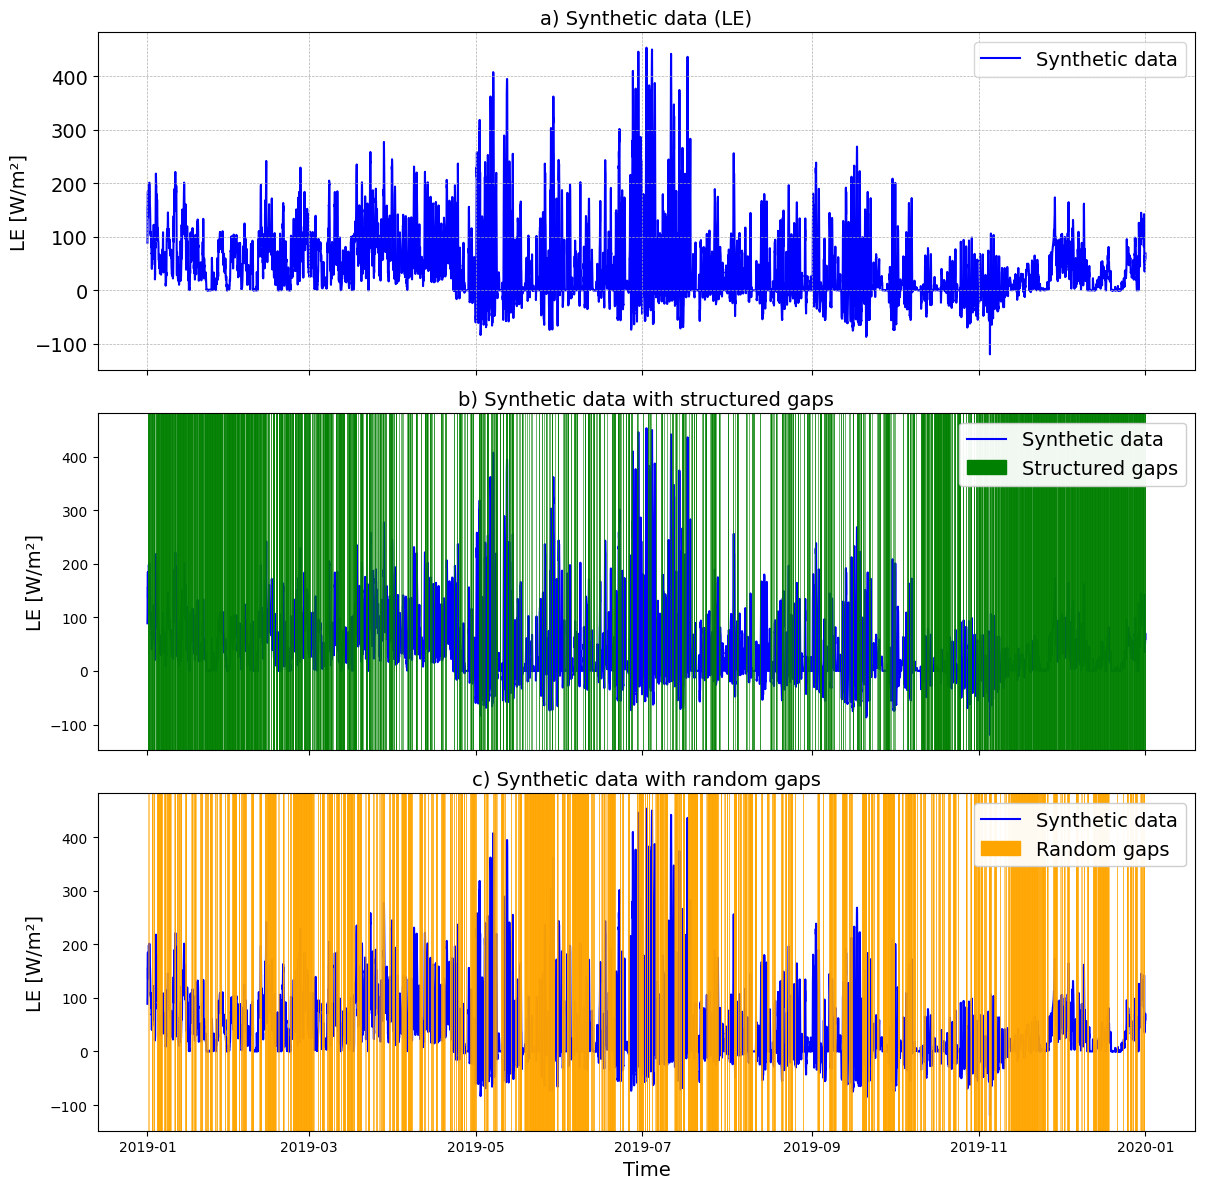

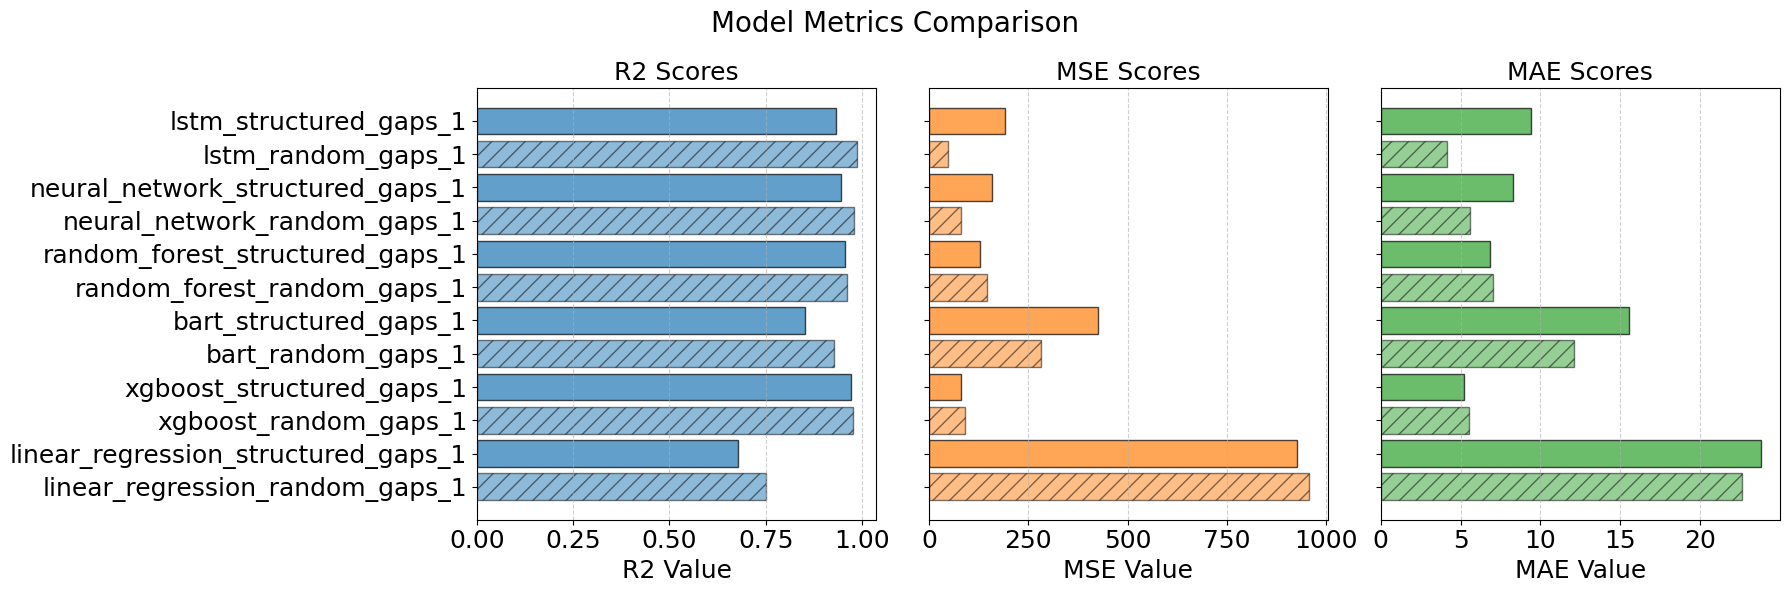

In [10]:
################################################################################
### Generation of charts for report
################################################################################

models = ['linear_regression_random_gaps_1', 'linear_regression_structured_gaps_1','xgboost_random_gaps_1','xgboost_structured_gaps_1', 'bart_random_gaps_1', 'bart_structured_gaps_1','random_forest_random_gaps_1','random_forest_structured_gaps_1', 'neural_network_random_gaps_1', 'neural_network_structured_gaps_1','lstm_random_gaps_1','lstm_structured_gaps_1']  # List your models here

# Figure 2 in report: Visualization of synthetic dataset and gaps (Figure 2 in report)
plot_data_with_gaps(syn_ds, random_gaps, structured_gaps)

# Figure 3.1 in report: Comparison of R2, MSE and MAE values for different models
plot_metrics_horizontal(models)

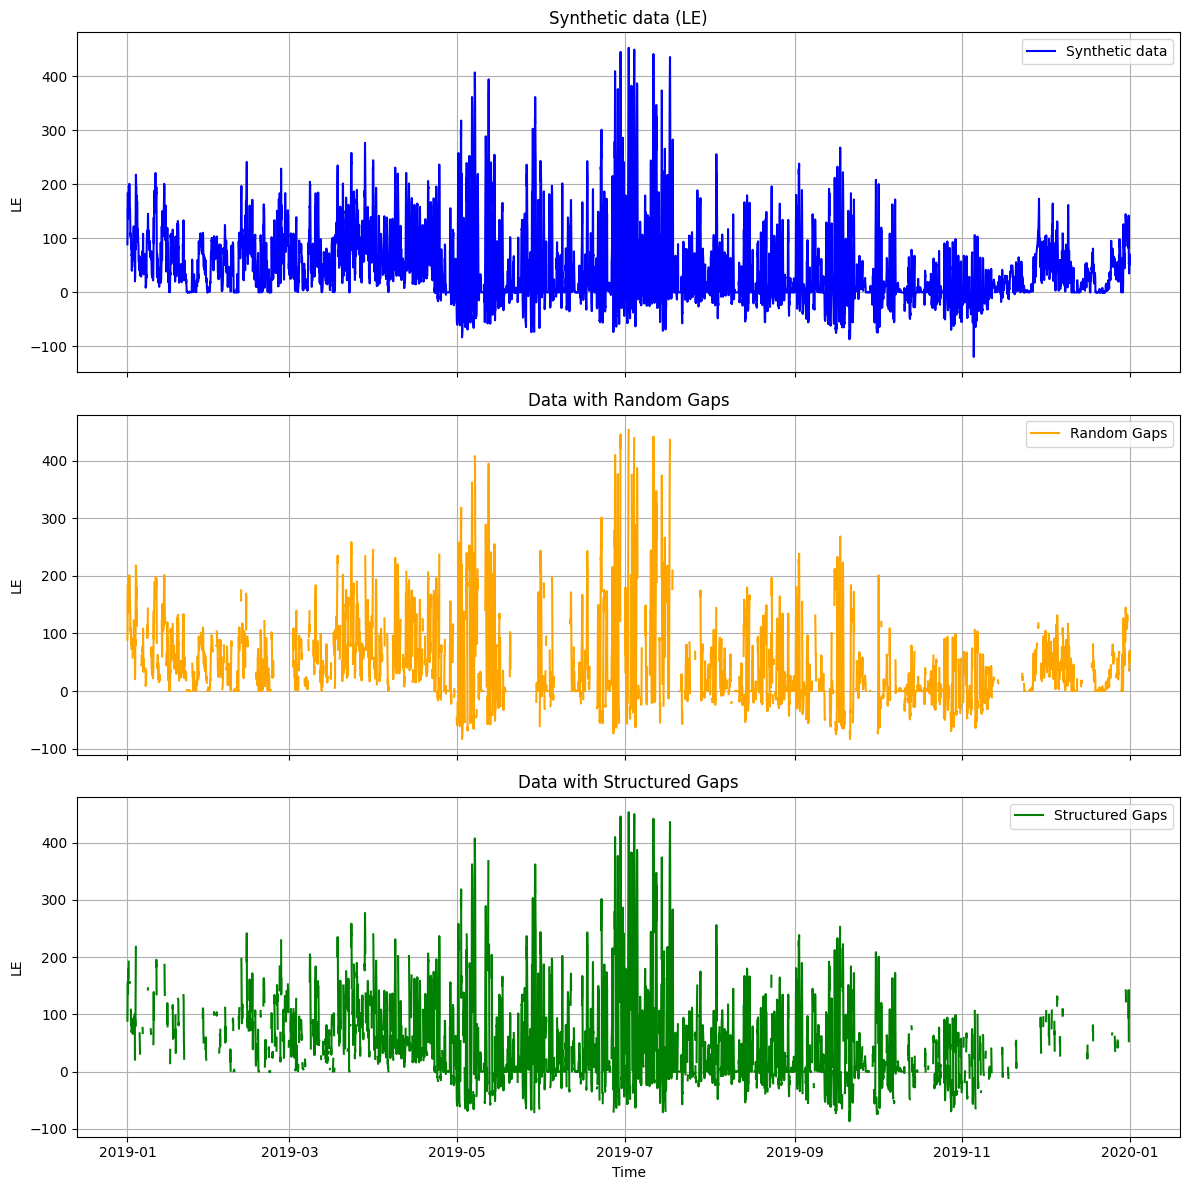

In [11]:
# Not included in report

# Set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot the Synthetic data
axes[0].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data')
axes[0].set_title('Synthetic data (LE)')
axes[0].set_ylabel('LE')
axes[0].grid(True)
axes[0].legend()

# Plot the data with random gaps
#axes[1].plot(syn_ds['time'], syn_ds['LE'], color='blue', alpha=0.3, label='Synthetic data (for reference)')
axes[1].plot(random_gaps['time'], random_gaps['LE_gaps'], color='orange', label='Random Gaps')
axes[1].set_title('Data with Random Gaps')
axes[1].set_ylabel('LE')
axes[1].grid(True)
axes[1].legend()

# Plot the data with structured gaps
#axes[2].plot(syn_ds['time'], syn_ds['LE'], color='blue', alpha=0.3, label='Synthetic data (for reference)')
axes[2].plot(structured_gaps['time'], structured_gaps['LE_gaps'], color='green', label='Structured Gaps')
axes[2].set_title('Data with Structured Gaps')
axes[2].set_ylabel('LE')
axes[2].set_xlabel('Time')
axes[2].grid(True)
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

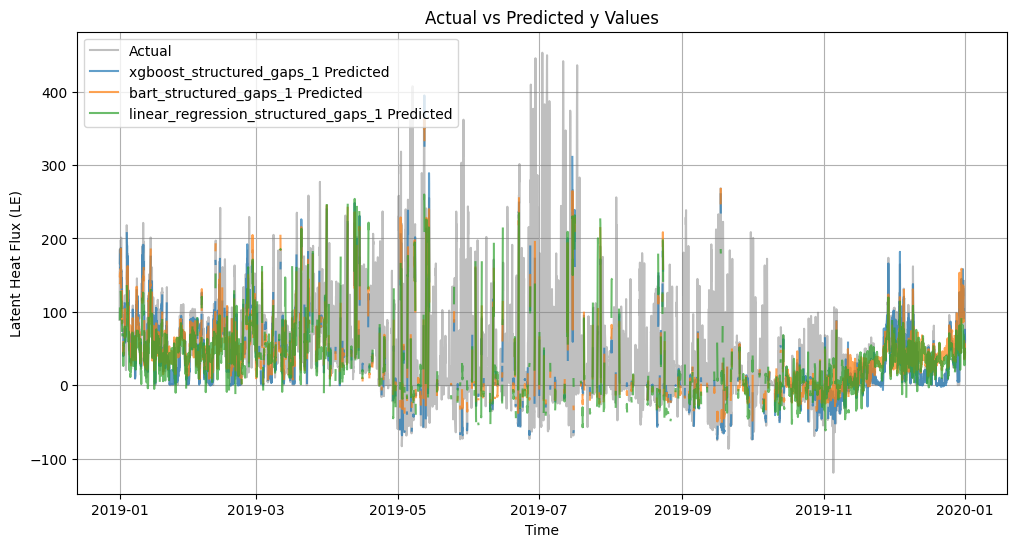

In [12]:
# Not included in report
models = ['xgboost_structured_gaps_1', 'bart_structured_gaps_1', 'linear_regression_structured_gaps_1']
plot_actual_vs_predicted(syn_ds, models)

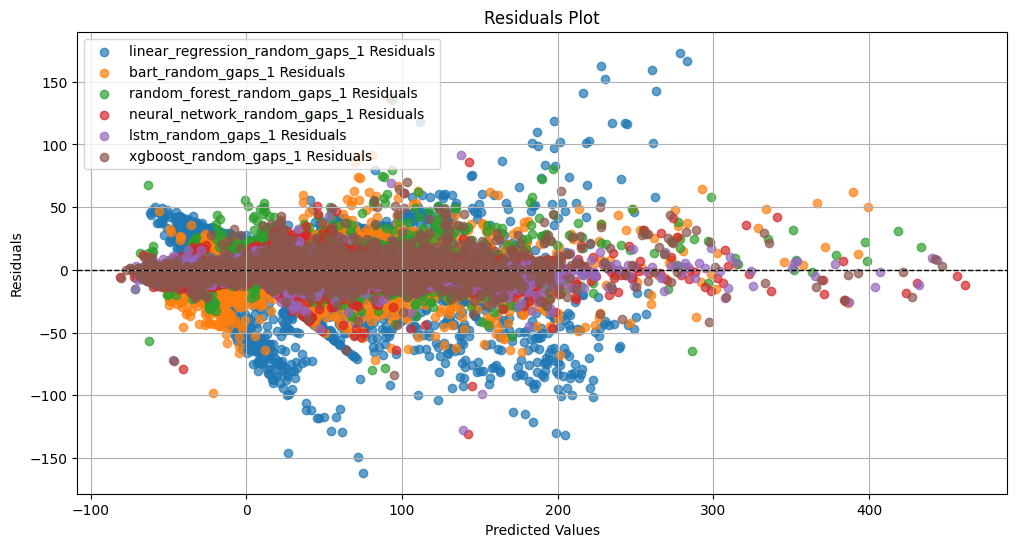

In [13]:
# Not included in report
models = ['linear_regression_random_gaps_1','bart_random_gaps_1','random_forest_random_gaps_1','neural_network_random_gaps_1','lstm_random_gaps_1','xgboost_random_gaps_1']  # List your models here
plot_residuals(models)